# Extracting data from web pages 
✅ In this noteBook we are going to extract data from relevant webpages relative to our needs based on links using Langchain `UnstructuredLoader` so we can feed the documents list to RAG after converting into Vector Embeddings
 than we are going to preprocess them by splitting , embedding and saving it to a vector database and the database we are going to use is `CHROMADB`

 
 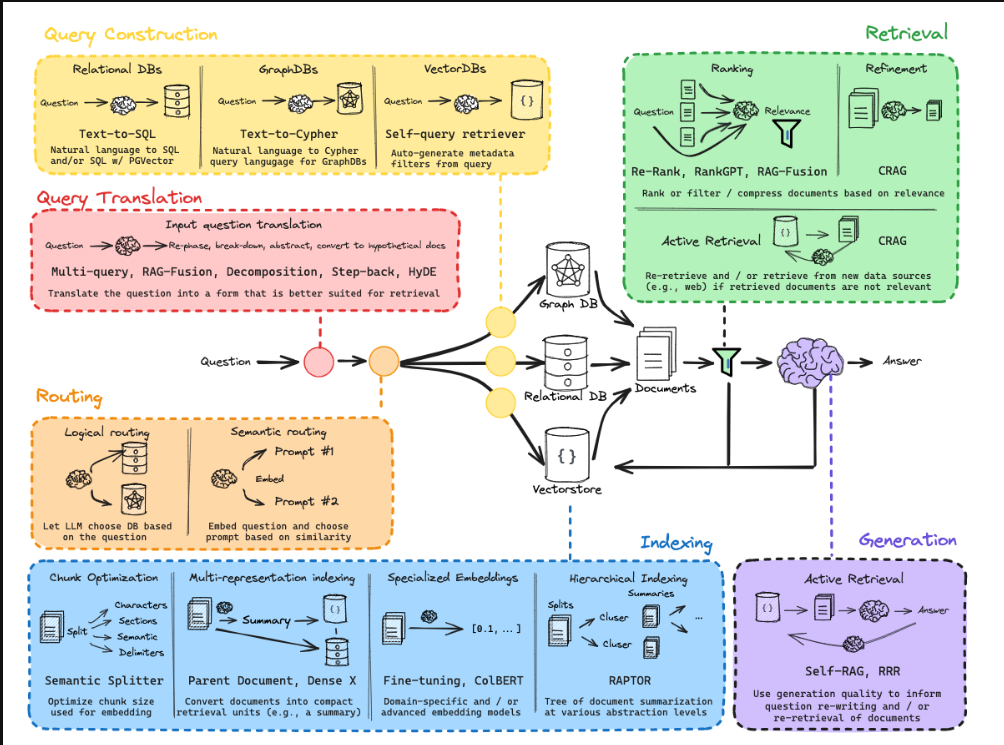

 the PDFS will be processed in another notebook 😊

In [2]:
# %pip install -qU langchain-community beautifulsoup4

In [3]:
# %pip install langchain-unstructured

In [4]:
# pip cache purge


In [5]:
# pip install langchain sentence-transformers chromadb


In [6]:
# %pip install ollama

In [7]:
# pip install -U sentence-transformers


In [8]:
# pip install langchain_openai

In [9]:
# # pip install -U langchain-huggingface
# %pip install -U langchain-ollama
# %pip install chromadb
# %pip install chromadb
# ! pip install langchain_community tiktoken langchain-openai langchainhub chromadb langchain

# Importing Library that we are gonna use 

In [ ]:
from typing import List
from langchain_core.documents import Document
from langchain_community.document_loaders import PyPDFLoader, WebBaseLoader
from langchain_unstructured import UnstructuredLoader
from langchain import hub
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
import os
import bs4
from sentence_transformers import SentenceTransformer
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_huggingface import HuggingFaceEmbeddings
import ollama
from langchain.embeddings import OllamaEmbeddings, HuggingFaceEmbeddings
from langchain_ollama import OllamaEmbeddings
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import chromadb
import uuid
import pandas as pd 
import os
from sklearn.manifold import TSNE
from langchain.embeddings import HuggingFaceEmbeddings




In [ ]:
# embeddings_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

## Loading the model we are gonne use for transorming to embedding 
the model is open source and is good one for embedding to be used later in retrival 

In [ ]:
# embeddings_model = SentenceTransformer("HIT-TMG/KaLM-embedding-multilingual-mini-instruct-v1.5")
embeddings_model = HuggingFaceEmbeddings(model_name="HIT-TMG/KaLM-embedding-multilingual-mini-instruct-v1.5")


In [ ]:
# data.delete(ids=data.get()['ids'])


# Configure `ChromaDB` for our work 

In [ ]:
# chroma_client.delete_collection(name="my_dataaaa")  # Deletes "my_dataaaa"


In [ ]:
chroma_db_path = "./chroma_db"  
chroma_client = chromadb.PersistentClient(path=chroma_db_path)

In [ ]:
data  = chroma_client.get_or_create_collection(name="my_dataaaa")

#  <p style="color: orange;">Document 0 Masteres-Procedure-de-Depot</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/152/Masteres-Procedure-de-Depot",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Masteres_Procedure_de_Depot = loader.load()

In [ ]:
Masteres_Procedure_de_Depot

## spliiting into chunks the doc0

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits1 = text_splitter.split_documents( Masteres_Procedure_de_Depot)

In [ ]:
splits1

## Saving to chromadb in data 

In [ ]:
contents1 = [doc.page_content for doc in splits1]
metadata1 = [doc.metadata for doc in splits1]

In [ ]:
embeddings1 = embeddings_model.encode(
    [doc.page_content for doc in splits1], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings1)

In [ ]:
ids = [str(uuid.uuid4()) for _ in range(len(contents1))]

In [ ]:
data.add(
    documents=contents1,
    embeddings=embeddings1,
    metadatas=metadata1,
    ids=ids
)

In [ ]:
# visulizing in a dataframe 
data_dict = {
    "ID": ids,
    "Document": contents1,
    "Metadata": metadata1,
    "Embedding Shape": [np.array(embed).shape for embed in embeddings1],
}

df = pd.DataFrame(data_dict)
df.tail()

In [ ]:
def append_data(contents, metadata, embeddings):
    '''this function will append the embeddings and metadata and 
    the document into the data_dict so we can visulize how it looks in chrom '''
    global df
    new_ids = list(range(len(df) + 1, len(df) + 1 + len(contents)))
    
    data_dict["ID"].extend(new_ids)
    data_dict["Document"].extend(contents)
    data_dict["Metadata"].extend(metadata)
    data_dict["Embedding Shape"].extend([np.array(embed).shape for embed in embeddings])
    
    df = pd.DataFrame(data_dict)


#  <p style="color: orange;">Document 1 Theses-Inscriptions-etProcedure-de-Depot</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/147/Theses-Inscriptions-etProcedure-de-Depot",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Theses_Inscriptions_etProcedure_de_Depot = loader.load()

In [ ]:
Theses_Inscriptions_etProcedure_de_Depot

## splitting into chunks the doc1

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits2 = text_splitter.split_documents( Theses_Inscriptions_etProcedure_de_Depot)

In [ ]:
splits2

In [ ]:
contents2= [doc.page_content for doc in splits2]
metadata2 = [doc.metadata for doc in splits2]

In [ ]:
embeddings2 = embeddings_model.encode(
    [doc.page_content for doc in splits2], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings2)

In [ ]:
ids2= [str(uuid.uuid4()) for _ in range(len(contents2))]

In [ ]:
data.add(
    documents=contents2,
    embeddings=embeddings2,
    metadatas=metadata2,
    ids=ids2
)

In [ ]:
append_data(contents2, metadata2, embeddings2)


In [ ]:
df

#  <p style="color: orange;"> Document 2  رشة_بعنوان_أهمية_الصحة_النفسية</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/articles/4798/%D9%88%D8%B1%D8%B4%D8%A9-%D8%A8%D8%B9%D9%86%D9%88%D8%A7%D9%86-%D8%A3%D9%87%D9%85%D9%8A%D8%A9-%D8%A7%D9%84%D8%B5%D8%AD%D8%A9-%D8%A7%D9%84%D9%86%D9%81%D8%B3%D9%8A%D8%A9",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
warcha_mental_health = loader.load()

In [ ]:
warcha_mental_health

## spitting doc 2 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits3 = text_splitter.split_documents( warcha_mental_health)

In [ ]:
splits3

In [ ]:
contents3= [doc.page_content for doc in splits3]
metadata3 = [doc.metadata for doc in splits3]

In [ ]:
embeddings3 = embeddings_model.encode(
    [doc.page_content for doc in splits3], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings3)

In [ ]:
ids3 = [str(uuid.uuid4()) for _ in range(len(contents3))]

In [ ]:
data.add(
    documents=contents3,
    embeddings=embeddings3,
    metadatas=metadata3,
    ids=ids3
)

In [ ]:
append_data(contents3, metadata3, embeddings3)


In [ ]:
df.tail()

# <p style="color: orange;"> Document 3 festival-de-la-creativite-estudiantine</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/articles/4795/festival-de-la-creativite-estudiantine",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
festival_de_la_creativite_estudiantinet = loader.load()

In [ ]:
festival_de_la_creativite_estudiantinet

## splitting the Doc3  into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits4 = text_splitter.split_documents( festival_de_la_creativite_estudiantinet)

In [ ]:
print(splits4[0].page_content)  # First chunk's content
print(splits4[0].metadata) 

In [ ]:
contents4= [doc.page_content for doc in splits4]
metadata4 = [doc.metadata for doc in splits4]

In [ ]:
embeddings4 = embeddings_model.encode(
    [doc.page_content for doc in splits4], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings4)

In [ ]:
ids4 = [str(uuid.uuid4()) for _ in range(len(contents4))]

In [ ]:
data.add(
    documents=contents4,
    embeddings=embeddings4,
    metadatas=metadata4,
    ids=ids4
)

In [ ]:
append_data(contents4, metadata4, embeddings4)


In [ ]:
df

# <p style="color: orange;"> Document 4 bourses-d-alternance-2025</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/articles/4813/bourses-d-alternance-2025",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Bourse_alternance = loader.load()

In [ ]:
Bourse_alternance

## splitting doc 4 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits5 = text_splitter.split_documents( Bourse_alternance)

In [ ]:
print(splits5[2].page_content)  
print(splits5[2].metadata) 

In [ ]:
contents5= [doc.page_content for doc in splits5]
metadata5 = [doc.metadata for doc in splits5]

In [ ]:
embeddings5 = embeddings_model.encode(
    [doc.page_content for doc in splits5], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings5)

In [ ]:
ids5 = [str(uuid.uuid4()) for _ in range(len(contents5))]

In [ ]:
data.add(
    documents=contents5,
    embeddings=embeddings5,
    metadatas=metadata5,
    ids=ids5
)

In [ ]:
append_data(contents5, metadata5, embeddings5)


In [ ]:
df

# <p style="color: orange;"> Document 5 the-indian-council-for-cultural-relations--iccr</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/articles/4807/the-indian-council-for-cultural-relations--iccr-",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
the_indian_council_for_cultural_relations = loader.load()

In [ ]:
the_indian_council_for_cultural_relations

## splitting doc 5 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits6 = text_splitter.split_documents( the_indian_council_for_cultural_relations)

In [ ]:
splits6

In [ ]:
contents6= [doc.page_content for doc in splits6]
metadata6 = [doc.metadata for doc in splits6]

In [ ]:
embeddings6 = embeddings_model.encode(
    [doc.page_content for doc in splits6], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings6)

In [ ]:
ids6 = [str(uuid.uuid4()) for _ in range(len(contents6))]

In [ ]:
data.add(
    documents=contents6,
    embeddings=embeddings6,
    metadatas=metadata6,
    ids=ids6
)

In [ ]:
append_data(contents6, metadata6, embeddings6)


In [ ]:
df

In [ ]:
# page_url = "https://fsm.rnu.tn/useruploads/files/au2425/NV%20ICCR.pdf"
# loader = PyPDFLoader(page_url)

# applications_guidelines_indian = []
# async for doc in loader.alazy_load():
#     applications_guidelines_indian.append(doc)

In [ ]:
# applications_guidelines_indian

In [ ]:
# documents6

In [ ]:
# pip install "unstructured[pdf]"

#  <p style="color: orange;"> Document 6 Règlement intérieur des examens</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/346/R%C3%A8glement-int%C3%A9rieur-des-examens",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Règlement_intérieur_des_examens = loader.load()

In [ ]:
Règlement_intérieur_des_examens

## splitting doc 6 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits7 = text_splitter.split_documents( Règlement_intérieur_des_examens)

In [ ]:
splits7

In [ ]:
contents7= [doc.page_content for doc in splits7]
metadata7 = [doc.metadata for doc in splits7]

In [ ]:
embeddings7 = embeddings_model.encode(
    [doc.page_content for doc in splits7], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings7)

In [ ]:
ids7 = [str(uuid.uuid4()) for _ in range(len(contents7))]

In [ ]:
data.add(
    documents=contents7,
    embeddings=embeddings7,
    metadatas=metadata7,
    ids=ids7
)

In [ ]:
append_data(contents7, metadata7, embeddings7)


In [ ]:
df

#  <p style="color: orange;">Document 7 Gestion des Stages & PFE (CPE-BR-01-00)</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/73/Stages-&-PFE",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Stages_PFE = loader.load()

In [ ]:
Stages_PFE

## splitting doc 7 into chunks

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits8 = text_splitter.split_documents( Stages_PFE)

In [ ]:
splits8

In [ ]:
contents8= [doc.page_content for doc in splits8]
metadata8 = [doc.metadata for doc in splits8]

In [ ]:
embeddings8= embeddings_model.encode(
    [doc.page_content for doc in splits8], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings8)

In [ ]:
ids8 = [str(uuid.uuid4()) for _ in range(len(contents8))]

In [ ]:
data.add(
    documents=contents8,
    embeddings=embeddings8,
    metadatas=metadata8,
    ids=ids8
)

In [ ]:
append_data(contents8, metadata8, embeddings8)


In [ ]:
df

#  <p style="color: orange;">Document 8 Procédure de déroulement des stages facultatifs (CPE-IN-01-00)</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/437/Proc%C3%A9dure-de-d%C3%A9roulement-des-stages-facultatif",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Procédure_de_déroulement_des_stages_facultatifs = loader.load()

In [ ]:
Procédure_de_déroulement_des_stages_facultatifs

## splitting doc 8 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits9 = text_splitter.split_documents( Procédure_de_déroulement_des_stages_facultatifs)

In [ ]:
splits9

In [ ]:
contents9= [doc.page_content for doc in splits9]
metadata9 = [doc.metadata for doc in splits9]

In [ ]:
embeddings9 = embeddings_model.encode(
    [doc.page_content for doc in splits9], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings9)

In [ ]:
ids9 = [str(uuid.uuid4()) for _ in range(len(contents9))]

In [ ]:
data.add(
    documents=contents9,
    embeddings=embeddings9,
    metadatas=metadata9,
    ids=ids9
)

In [ ]:
append_data(contents9, metadata9, embeddings9)


In [ ]:
df

#  <p style="color: orange;"> Document 9 Procédure de déroulement des stages obligatoires (CPE-IN-02-00)</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/75/Proc%C3%A9dure-de-d%C3%A9roulement-des-stages",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Procédure_de_déroulement_des_stages_obligatoires = loader.load()

In [ ]:
Procédure_de_déroulement_des_stages_obligatoires

## splitting doc 9 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits10= text_splitter.split_documents(Procédure_de_déroulement_des_stages_obligatoires)

In [ ]:
splits10

In [ ]:
contents10= [doc.page_content for doc in splits10]
metadata10 = [doc.metadata for doc in splits10]

In [ ]:
embeddings10 = embeddings_model.encode(
    [doc.page_content for doc in splits10], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings10)

In [ ]:
ids10 = [str(uuid.uuid4()) for _ in range(len(contents10))]

In [ ]:
data.add(
    documents=contents10,
    embeddings=embeddings10,
    metadatas=metadata10,
    ids=ids10
)

In [ ]:
append_data(contents10, metadata10, embeddings10)


In [ ]:
df

#  <p style="color: orange;"> Document 10 Partenariat international</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/9/Partenariat-international",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Partenariat_international = loader.load()

In [ ]:
Partenariat_international

## splitting doc 10 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits11 = text_splitter.split_documents(Partenariat_international)

In [ ]:
splits11

In [ ]:
contents11= [doc.page_content for doc in splits11]
metadata11 = [doc.metadata for doc in splits11]

In [ ]:
embeddings11 = embeddings_model.encode(
    [doc.page_content for doc in splits11], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings11)

In [ ]:
ids11 = [str(uuid.uuid4()) for _ in range(len(contents11))]

In [ ]:
data.add(
    documents=contents11,
    embeddings=embeddings11,
    metadatas=metadata11,
    ids=ids11
)

In [ ]:
append_data(contents11, metadata11, embeddings11)


In [ ]:
df

#  <p style="color: orange;"> Document 11 Communication</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/140/Communication",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Communication = loader.load()

In [ ]:
Communication

## splitting doc 11 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits12 = text_splitter.split_documents(Communication)

In [ ]:
splits12

In [ ]:
contents12= [doc.page_content for doc in splits12]
metadata12 = [doc.metadata for doc in splits12]

In [ ]:
embeddings12 = embeddings_model.encode(
    [doc.page_content for doc in splits12], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings12)

In [ ]:
ids12 = [str(uuid.uuid4()) for _ in range(len(contents12))]

In [ ]:
data.add(
    documents=contents12,
    embeddings=embeddings12,
    metadatas=metadata12,
    ids=ids12
)

In [ ]:
append_data(contents12, metadata12, embeddings12)


In [ ]:
df

#  <p style="color: orange;"> Document 12 Liens utiles</p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/links",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("links_container","link_item","link_tags")
        )
    ),
)
Liens_utiles = loader.load()

In [ ]:
Liens_utiles

## splitting doc 12 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits13 = text_splitter.split_documents(Liens_utiles)

In [ ]:
splits13

In [ ]:
contents13= [doc.page_content for doc in splits13]
metadata13 = [doc.metadata for doc in splits13]

In [ ]:
embeddings13 = embeddings_model.encode(
    [doc.page_content for doc in splits13], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings13)

In [ ]:
ids13 = [str(uuid.uuid4()) for _ in range(len(contents13))]

In [ ]:
data.add(
    documents=contents13,
    embeddings=embeddings13,
    metadatas=metadata13,
    ids=ids13
)

In [ ]:
append_data(contents13, metadata13, embeddings13)


In [ ]:
df

#  <p style="color: orange;"> Document 13 Departement Chimie </p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/departements/CH/4/chimie",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Chimie = loader.load()

In [ ]:
Chimie

## splitting doc 13 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits14 = text_splitter.split_documents(Chimie)

In [ ]:
splits14

In [ ]:
contents14= [doc.page_content for doc in splits14]
metadata14 = [doc.metadata for doc in splits14]

In [ ]:
embeddings14 = embeddings_model.encode(
    [doc.page_content for doc in splits14], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings14)

In [ ]:
ids14 = [str(uuid.uuid4()) for _ in range(len(contents14))]

In [ ]:
data.add(
    documents=contents14,
    embeddings=embeddings14,
    metadatas=metadata14,
    ids=ids14
)

In [ ]:
append_data(contents14, metadata14, embeddings14)


In [ ]:
df

#  <p style="color: orange;"> Document 14 Departement Mathematique  </p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/departements/M/1/mathematiques",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("selectEnsFilter")
        )
    ),
)
math = loader.load()

In [ ]:
math

## splitting doc 14 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits15 = text_splitter.split_documents(math)

In [ ]:
splits15

In [ ]:
contents15= [doc.page_content for doc in splits15]
metadata15 = [doc.metadata for doc in splits15]

In [ ]:
embeddings15 = embeddings_model.encode(
    [doc.page_content for doc in splits15], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings15)

In [ ]:
ids15 = [str(uuid.uuid4()) for _ in range(len(contents15))]

In [ ]:
data.add(
    documents=contents15,
    embeddings=embeddings15,
    metadatas=metadata15,
    ids=ids15
)

In [ ]:
append_data(contents15, metadata15, embeddings15)


In [ ]:
df

#  <p style="color: orange;"> Document 15 Departement informatique   </p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/departements/Info/2/informatique",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("selectEnsFilter")
        )
    ),
)
info = loader.load()

In [ ]:
info

## splitting doc 15 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits16=text_splitter.split_documents(info)

In [ ]:
splits16

In [ ]:
contents16= [doc.page_content for doc in splits16]
metadata16 = [doc.metadata for doc in splits16]

In [ ]:
embeddings16 = embeddings_model.encode(
    [doc.page_content for doc in splits16], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings16)

In [ ]:
ids16 = [str(uuid.uuid4()) for _ in range(len(contents16))]

In [ ]:
data.add(
    documents=contents16,
    embeddings=embeddings16,
    metadatas=metadata16,
    ids=ids16
)

In [ ]:
append_data(contents16, metadata16, embeddings16)


In [ ]:
df

#  <p style="color: orange;">Document 16 departement Physiqye   </p>

# Document 16 Departement 16 

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/departements/PH/3/physique",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("selectEnsFilter")
        )
    ),
)
physique = loader.load()

In [ ]:
physique

## splitting doc 16 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits17 = text_splitter.split_documents(physique)

In [ ]:
splits17

In [ ]:
contents17= [doc.page_content for doc in splits17]
metadata17 = [doc.metadata for doc in splits17]

In [ ]:
embeddings17 = embeddings_model.encode(
    [doc.page_content for doc in splits17], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings17)

In [ ]:
ids17 = [str(uuid.uuid4()) for _ in range(len(contents17))]

In [ ]:
data.add(
    documents=contents17,
    embeddings=embeddings17,
    metadatas=metadata17,
    ids=ids17
)

In [ ]:
append_data(contents17, metadata17, embeddings17)


In [ ]:
df

#  <p style="color: orange;">Document  17  Enseignement Tronc Commun  </p>

In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/departements/ET/5/enseignement-tronc-commun",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Enseignement_Tronc_Commun = loader.load()

In [ ]:
Enseignement_Tronc_Commun

## splitting doc 17 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits18 = text_splitter.split_documents(Enseignement_Tronc_Commun)

In [ ]:
splits18

In [ ]:
contents18= [doc.page_content for doc in splits18]
metadata18 = [doc.metadata for doc in splits18]

In [ ]:
embeddings18 = embeddings_model.encode(
    [doc.page_content for doc in splits18], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings18)

In [ ]:
ids18 = [str(uuid.uuid4()) for _ in range(len(contents18))]

In [ ]:
data.add(
    documents=contents18,
    embeddings=embeddings18,
    metadatas=metadata18,
    ids=ids18
)

In [ ]:
append_data(contents18, metadata18, embeddings18)


In [ ]:
df

#  <p style="color: orange;">Document 18 اخر بلاغ للتسجيل بالنسبة للسنة الجامعية  </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/articles/4712/%D8%A7%D8%AE%D8%B1-%D8%A8%D9%84%D8%A7%D8%BA-%D9%84%D9%84%D8%AA%D8%B3%D8%AC%D9%8A%D9%84-%D8%A8%D8%A7%D9%84%D9%86%D8%B3%D8%A8%D8%A9-%D9%84%D9%84%D8%B3%D9%86%D8%A9-%D8%A7%D9%84%D8%AC%D8%A7%D9%85%D8%B9%D9%8A%D8%A9-2024-2025",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
ekher_balegh = loader.load()

In [ ]:
ekher_balegh

## splitting doc 18 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits19 = text_splitter.split_documents(ekher_balegh)

In [ ]:
splits19

In [ ]:
contents19= [doc.page_content for doc in splits19]
metadata19 = [doc.metadata for doc in splits19]

In [ ]:
embeddings19 = embeddings_model.encode(
    [doc.page_content for doc in splits19], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings19)

In [ ]:
ids19 = [str(uuid.uuid4()) for _ in range(len(contents19))]

In [ ]:
data.add(
    documents=contents19,
    embeddings=embeddings19,
    metadatas=metadata19,
    ids=ids19
)

In [ ]:
append_data(contents19, metadata19, embeddings19)


In [ ]:
df

#  <p style="color: orange;">Documents 19 Comptes extranet des étudiants 2024-2025 </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/articles/4673/comptes-extranet-des-etudiants-2024-2025",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
comptes_extranet_des_etudiants = loader.load()

In [ ]:
comptes_extranet_des_etudiants

## splitting doc 19 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits20 = text_splitter.split_documents(comptes_extranet_des_etudiants)

In [ ]:
splits20

In [ ]:
contents20= [doc.page_content for doc in splits20]
metadata20 = [doc.metadata for doc in splits20]

In [ ]:
embeddings20 = embeddings_model.encode(
    [doc.page_content for doc in splits20], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings20)

In [ ]:
ids20 = [str(uuid.uuid4()) for _ in range(len(contents20))]

In [ ]:
data.add(
    documents=contents20,
    embeddings=embeddings20,
    metadatas=metadata20,
    ids=ids20
)

In [ ]:
append_data(contents20, metadata20, embeddings20)


In [ ]:
df

#  <p style="color: orange;"> Document 20  بلاغ الترسيم للسنة الجامعية </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/articles/4395/%D8%A8%D9%84%D8%A7%D8%BA-%D8%A7%D9%84%D8%AA%D8%B1%D8%B3%D9%8A%D9%85-%D9%84%D9%84%D8%B3%D9%86%D8%A9-%D8%A7%D9%84%D8%AC%D8%A7%D9%85%D8%B9%D9%8A%D8%A9-2024-2025",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
balegh_tarsim = loader.load()


In [ ]:
balegh_tarsim

## splitting doc 20 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits21 = text_splitter.split_documents(balegh_tarsim)

In [ ]:
splits21

In [ ]:
contents21= [doc.page_content for doc in splits21]
metadata21= [doc.metadata for doc in splits21]

In [ ]:
embeddings21= embeddings_model.encode(
    [doc.page_content for doc in splits21], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings21)

In [ ]:
ids21 = [str(uuid.uuid4()) for _ in range(len(contents21))]

In [ ]:
data.add(
    documents=contents21,
    embeddings=embeddings21,
    metadatas=metadata21,
    ids=ids21
)

In [ ]:
append_data(contents21, metadata21, embeddings21)


In [ ]:
df

#  <p style="color: orange;">Document 21 Fiche de renseignements des diplômés </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/138/Fiche-de-renseignements-des-dipl%C3%B4m%C3%A9s",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
Fiche_de_renseignements_des_diplome = loader.load()

In [ ]:
Fiche_de_renseignements_des_diplome

## splitting doc 21 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits22 = text_splitter.split_documents(Fiche_de_renseignements_des_diplome)

In [ ]:
splits22

In [ ]:
contents22= [doc.page_content for doc in splits22]
metadata22 = [doc.metadata for doc in splits22]

In [ ]:
embeddings22 = embeddings_model.encode(
    [doc.page_content for doc in splits22], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings22)

In [ ]:
ids22 = [str(uuid.uuid4()) for _ in range(len(contents22))]

In [ ]:
data.add(
    documents=contents22,
    embeddings=embeddings22,
    metadatas=metadata22,
    ids=ids22
)

In [ ]:
append_data(contents22, metadata22, embeddings22)


In [ ]:
df

#  <p style="color: orange;">Document 22 Loi de creation FSM  </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/1/Loi-de-cr%C3%A9ation",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
loi_de_creation = loader.load()

In [ ]:
loi_de_creation

## splitting doc 22 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits23 = text_splitter.split_documents(loi_de_creation)

In [ ]:
splits23

In [ ]:
contents23= [doc.page_content for doc in splits23]
metadata23 = [doc.metadata for doc in splits23]

In [ ]:
embeddings23 = embeddings_model.encode(
    [doc.page_content for doc in splits23], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings23)

In [ ]:
ids23 = [str(uuid.uuid4()) for _ in range(len(contents23))]

In [ ]:
data.add(
    documents=contents23,
    embeddings=embeddings23,
    metadatas=metadata23,
    ids=ids23
)

In [ ]:
append_data(contents23, metadata23, embeddings23)


In [ ]:
df

#  <p style="color: orange;">Document 23 loi en chiffre  </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/pages/3/En-chiffres",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
loi_en_chiffre = loader.load()

In [ ]:
loi_en_chiffre

## splitting doc 23 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits24 = text_splitter.split_documents(loi_en_chiffre)

In [ ]:
splits24

In [ ]:
contents24= [doc.page_content for doc in splits24]
metadata24 = [doc.metadata for doc in splits24]

In [ ]:
embeddings24 = embeddings_model.encode(
    [doc.page_content for doc in splits24], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings24)

In [ ]:
ids24 = [str(uuid.uuid4()) for _ in range(len(contents24))]

In [ ]:
data.add(
    documents=contents24,
    embeddings=embeddings24,
    metadatas=metadata24,
    ids=ids24
)

In [ ]:
append_data(contents24, metadata24, embeddings24)


In [ ]:
df

# LICENCE

#  <p style="color: orange;">Document 24 PARCOURS LMD Mathématiques Appliquées</p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("http://www.parcours-lmd.salima.tn/listeueetab.php?parc=ABhRHFxzAmNUZVIoBj4ENQYgX2sBPA==&etab=VjJQYQk7",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("center")
        )
    ),
)
parcours_math_appli = loader.load()

In [ ]:
parcours_math_appli

## splitting doc 24 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits25 = text_splitter.split_documents(parcours_math_appli)

In [ ]:
splits25

In [ ]:
contents25= [doc.page_content for doc in splits25]
metadata25 = [doc.metadata for doc in splits25]

In [ ]:
embeddings25 = embeddings_model.encode(
    [doc.page_content for doc in splits25], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings25)

In [ ]:
ids25 = [str(uuid.uuid4()) for _ in range(len(contents25))]

In [ ]:
data.add(
    documents=contents25,
    embeddings=embeddings25,
    metadatas=metadata25,
    ids=ids25
)

In [ ]:
append_data(contents25, metadata25, embeddings25)


In [ ]:
df

#  <p style="color: orange;"> Document 25 parcours lmd Computer Science</p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("http://www.parcours-lmd.salima.tn/listeueetab.php?parc=UkpTHlxzUzJXZlctDjJTYFZwDDI=&etab=VjJZaAg6",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("center")
        )
    ),
)
parcours_computer_science = loader.load()

In [ ]:
parcours_computer_science

## splitting doc 25 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits26 = text_splitter.split_documents(parcours_computer_science)

In [ ]:
splits26

In [ ]:
contents26= [doc.page_content for doc in splits26]
metadata26= [doc.metadata for doc in splits26]

In [ ]:
embeddings26 = embeddings_model.encode(
    [doc.page_content for doc in splits26], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings26)

In [ ]:
ids26 = [str(uuid.uuid4()) for _ in range(len(contents26))]

In [ ]:
data.add(
    documents=contents26,
    embeddings=embeddings26,
    metadatas=metadata26,
    ids=ids26
)

In [ ]:
append_data(contents26, metadata26, embeddings26)


In [ ]:
df

#  <p style="color: orange;"> Document 26 Parcours LMD Mesures et Instrumentation</p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("http://www.parcours-lmd.salima.tn/listeueetab.php?parc=W0NXGlp1UjNWZwN5BzkHMVN1DzsBPA==&etab=BGBYaQw+",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("center")
        )
    ),
)
parcours_Mesures = loader.load()

In [ ]:
parcours_Mesures

## spitting doc 26 inti chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits27 = text_splitter.split_documents(parcours_Mesures)

In [ ]:
splits27

In [ ]:
contents27= [doc.page_content for doc in splits27]
metadata27= [doc.metadata for doc in splits27]

In [ ]:
embeddings27 = embeddings_model.encode(
    [doc.page_content for doc in splits27], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings27)

In [ ]:
ids27 = [str(uuid.uuid4()) for _ in range(len(contents27))]

In [ ]:
data.add(
    documents=contents27,
    embeddings=embeddings27,
    metadatas=metadata27,
    ids=ids27
)

In [ ]:
append_data(contents27, metadata27, embeddings27)


In [ ]:
df

#  <p style="color: orange;">Document 27 Parcours LMD Physique </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("http://www.parcours-lmd.salima.tn/listeueetab.php?parc=W0NZFFp1UjNcbVshDjAENlJ0X2tTbg==&etab=AWUDMl9t",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("center")
        )
    ),
)
parcours_physique = loader.load()

In [ ]:
parcours_physique

## splitting doc 27 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits28 = text_splitter.split_documents(parcours_physique)

In [ ]:
splits28

In [ ]:
contents28= [doc.page_content for doc in splits28]
metadata28= [doc.metadata for doc in splits28]

In [ ]:
embeddings28 = embeddings_model.encode(
    [doc.page_content for doc in splits28], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings28)

In [ ]:
ids28 = [str(uuid.uuid4()) for _ in range(len(contents28))]

In [ ]:
data.add(
    documents=contents28,
    embeddings=embeddings28,
    metadatas=metadata28,
    ids=ids28
)

In [ ]:
append_data(contents28, metadata28, embeddings28)


In [ ]:
df

#  <p style="color: orange;">Document 28 Parcours LMD chimie  </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("http://www.parcours-lmd.salima.tn/listeueetab.php?parc=W0NYFV9wVDVcbQF7BzkKPQQiCz8HOg==&etab=B2NUZQAy",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("center")
        )
    ),
)
parcours_chimie = loader.load()

In [ ]:
parcours_chimie

## splitting doc 28 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits29= text_splitter.split_documents(parcours_chimie)

In [ ]:
splits29

In [ ]:
contents29= [doc.page_content for doc in splits29]
metadata29= [doc.metadata for doc in splits29]

In [ ]:
embeddings29 = embeddings_model.encode(
    [doc.page_content for doc in splits29], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings29)

In [ ]:
ids29 = [str(uuid.uuid4()) for _ in range(len(contents29))]

In [ ]:
data.add(
    documents=contents29,
    embeddings=embeddings29,
    metadatas=metadata29,
    ids=ids29
)

In [ ]:
append_data(contents29, metadata29, embeddings29)


In [ ]:
df

#  <p style="color: orange;"> Document 29 Parcours LMD Physique-Chimie</p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("http://www.parcours-lmd.salima.tn/listeueetab.php?parc=Bh4HSlh3VTQGN1ctVWsAMVJ0DjA=&etab=VjJZaA0/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("center")
        )
    ),
)
parcours_physique_chimie = loader.load()

In [ ]:
parcours_physique_chimie

## splitting doc 29 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits30= text_splitter.split_documents(parcours_physique_chimie)

In [ ]:
splits30

In [ ]:
contents30= [doc.page_content for doc in splits30]
metadata30= [doc.metadata for doc in splits30]

In [ ]:
embeddings30 = embeddings_model.encode(
    [doc.page_content for doc in splits30], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings30)

In [ ]:
ids30 = [str(uuid.uuid4()) for _ in range(len(contents30))]

In [ ]:
data.add(
    documents=contents30,
    embeddings=embeddings30,
    metadatas=metadata30,
    ids=ids30
)

In [ ]:
append_data(contents30, metadata30, embeddings30)


In [ ]:
df

#  <p style="color: orange;">Document 30 Document de demande de diplome </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("https://fsm.rnu.tn/fra/articles/1249/demande-de-diplomes",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("content")
        )
    ),
)
doc_demande_de_diplome = loader.load()

In [ ]:
doc_demande_de_diplome

## splitting doc 30 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits31 = text_splitter.split_documents(doc_demande_de_diplome)

In [ ]:
splits31

In [ ]:
contents31= [doc.page_content for doc in splits31]
metadata31= [doc.metadata for doc in splits31]

In [ ]:
embeddings31 = embeddings_model.encode(
    [doc.page_content for doc in splits31], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings31)

In [ ]:
ids31 = [str(uuid.uuid4()) for _ in range(len(contents31))]

In [ ]:
data.add(
    documents=contents31,
    embeddings=embeddings31,
    metadatas=metadata31,
    ids=ids31
)

In [ ]:
append_data(contents31, metadata31, embeddings31)


In [ ]:
df

#  <p style="color: orange;">Document 31 INFORMATION sur master rechereche mathematique  </p>


In [ ]:
loader = WebBaseLoader(
    web_paths=("https://um.rnu.tn/fr/formations/formation-lmd/master/mat%C3%A8re-de-recherche-en-math%C3%A9matiques-fsm/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("single-post-content single-content")
        )
    ),
)
info_supp_mastere_math = loader.load()

In [ ]:
info_supp_mastere_math

## spitting doc 31 into chunks 

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=10)
splits32 = text_splitter.split_documents(info_supp_mastere_math)

In [ ]:
splits32

In [ ]:
contents32= [doc.page_content for doc in splits32]
metadata32 = [doc.metadata for doc in splits32]

In [ ]:
embeddings32 = embeddings_model.encode(
    [doc.page_content for doc in splits32], 
    normalize_embeddings=True,
    batch_size=256, 
    show_progress_bar=True
    )
print(embeddings32)

In [ ]:
ids32 = [str(uuid.uuid4()) for _ in range(len(contents32))]

In [ ]:
data.add(
    documents=contents32,
    embeddings=embeddings32,
    metadatas=metadata32,
    ids=ids32
)

In [ ]:
append_data(contents32, metadata32, embeddings32)


In [ ]:
df

# putting all lists in one dictionary 

In [ ]:
# data = {
#     "Masteres_Procedure_de_Depot": Masteres_Procedure_de_Depot,
#     "Theses_Inscriptions_etProcedure_de_Depot": Theses_Inscriptions_etProcedure_de_Depot,
#     "ورشة_بعنوان_أهمية_الصحة_النفسية": warcha_mental_health,
#     "festival_de_la_creativite_estudiantinet": festival_de_la_creativite_estudiantinet,
#     "Bourse_alternance": Bourse_alternance,
#     "the_indian_council_for_cultural_relations": the_indian_council_for_cultural_relations,
#     "Règlement_intérieur_des_examens": Règlement_intérieur_des_examens,
#     "Stages_PFE":Stages_PFE,
#     "Procédure_de_déroulement_des_stages_facultatifs": Procédure_de_déroulement_des_stages_facultatifs,
#     "Procédure_de_déroulement_des_stages_obligatoires": Procédure_de_déroulement_des_stages_obligatoires,
#     "Partenariat_international": Partenariat_international,
#     "Communication": Communication,
#     "Liens_utiles": Liens_utiles,
#     "Chimie": Chimie,
#     "math": math,
#     "info": info,
#     "physique": physique,
#     "Enseignement_Tronc_Commun": Enseignement_Tronc_Commun,
#     "ekher_balegh": ekher_balegh,
#     "comptes_extranet_des_etudiants": comptes_extranet_des_etudiants,
#     "elements": elements,
#     "Fiche_de_renseignements_des_diplome": Fiche_de_renseignements_des_diplome,
#     "loi_de_creation": loi_de_creation,
#     "loi_en_chiffre": loi_en_chiffre,
#     "parcours_math_appli": parcours_math_appli,
#     "parcours_computer_science":parcours_computer_science,
#     "parcours_Mesures": parcours_Mesures,
#     "parcours_physique": parcours_physique,
#     "parcours_chimie":parcours_chimie,
#     "parcours_physique_chimie": parcours_physique_chimie,
#     "doc_demande_de_diplome": doc_demande_de_diplome,
#     "info_supp_mastere_math": info_supp_mastere_math
# }


# Visuliazing chromadb 

In [ ]:
data = data.get(include=['embeddings'])
print(data)


In [ ]:
if 'embeddings' in data:
    embeddings_array = np.array(data['embeddings'])
    print("Embeddings shape:", embeddings_array.shape)
else:
    print("No embeddings found in vectorstore.")


In [ ]:
if embeddings_array.size > 0: 
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_array)

    # Plot embeddings
    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title("2D Visualization of Embeddings")
    plt.show()
else:
    print("No embeddings available for PCA visualization.")


# Manully testing to retrive 1st attempt just checking 👌

In [ ]:
data = chroma_client.get_collection(name="my_dataaaa")

In [ ]:
query_embedding =  embeddings_model.encode("Quelles sont les documents de stage obligatoire?")

results = data.query(
    query_embeddings=[query_embedding],  
    n_results=100
)

In [ ]:
for doc in results['documents']:
    print(doc)

In [ ]:
chroma_client = chromadb.PersistentClient(path="chroma_db")
collections = chroma_client.list_collections()
print("Available collections:", collections)  
if "my_dataaaa" in collections:
    collection = chroma_client.get_collection(name="my_dataaaa")
    print(" Successfully loaded collection:", collection)
else:
    print("Collection 'my_dataaaa' does not exist. Available collections:", collections)
